In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# folderPath = "/content/drive/Othercomputers/z590/Colab Notebooks/NN Project"
folderPath = "."

Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [3]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import regularizers, optimizers

In [5]:
import random
random.seed(0)

# Part A

A.1.

In [6]:
signal_df = pd.read_csv(folderPath + "/NN Project Data - Signal.csv")

In [7]:
signal_df.shape

(1599, 12)

In [8]:
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


1.B.

In [9]:
percent_missing = (signal_df.isnull().sum() * 100)/ len(signal_df)
print(percent_missing)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


There are no null values in the data

1.C.

In [10]:
signal_df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [11]:
signal_df.duplicated().sum()

240

We can see there are 240 duplicates.  
Dropping duplicates

In [12]:
signal_data = signal_df.drop_duplicates()

In [13]:
signal_data.shape

(1359, 12)

1.D. & 1.E.

In [14]:
signal_columns = signal_df.columns
signal_columns

Index(['Parameter 1', 'Parameter 2', 'Parameter 3', 'Parameter 4',
       'Parameter 5', 'Parameter 6', 'Parameter 7', 'Parameter 8',
       'Parameter 9', 'Parameter 10', 'Parameter 11', 'Signal_Strength'],
      dtype='object')

Drawing box plot and distplot for all parameters and Target variable.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


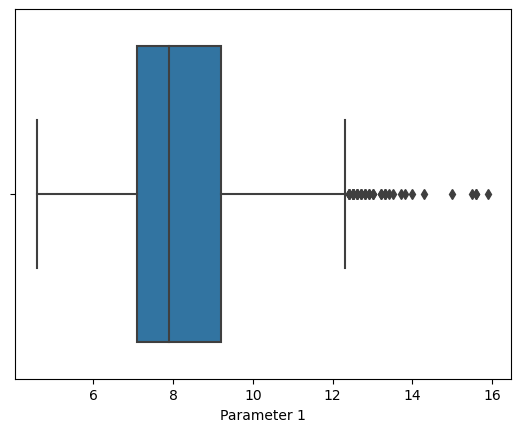

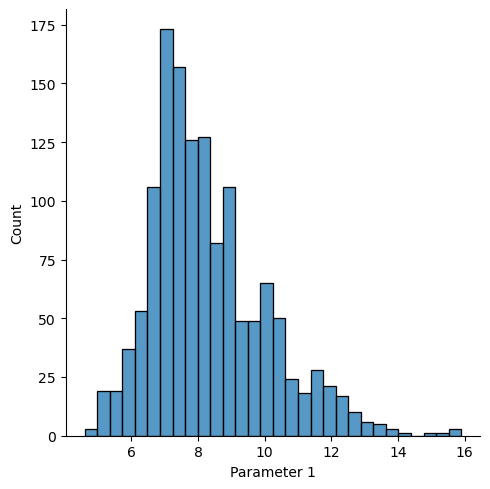

Distribution of  Parameter 1
Mean is: 8.310596026490087
Median is: 7.9
Mode is: 0    7.2
Name: Parameter 1, dtype: float64
Standard deviation is: 1.736989807532466
Skewness is: 0.9410413664561449
Maximum is: 15.9
Minimum is: 4.6


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


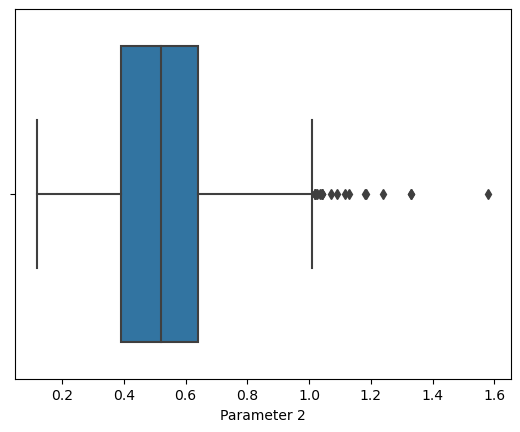

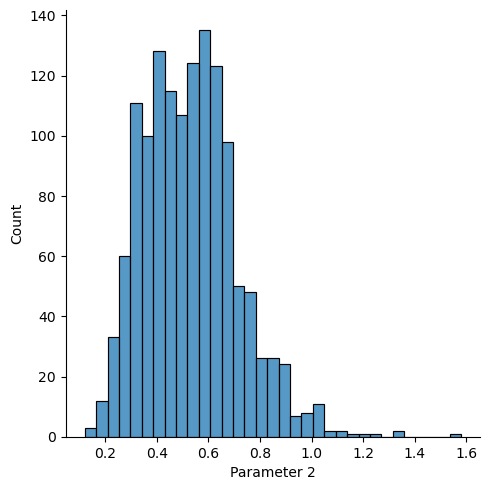

Distribution of  Parameter 2
Mean is: 0.5294775570272258
Median is: 0.52
Mode is: 0    0.5
Name: Parameter 2, dtype: float64
Standard deviation is: 0.18303131761907185
Skewness is: 0.7292789463991854
Maximum is: 1.58
Minimum is: 0.12


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


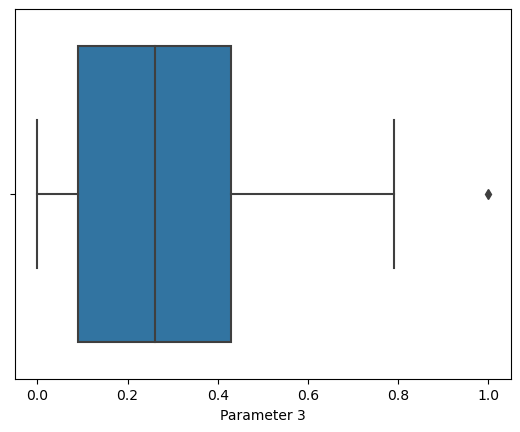

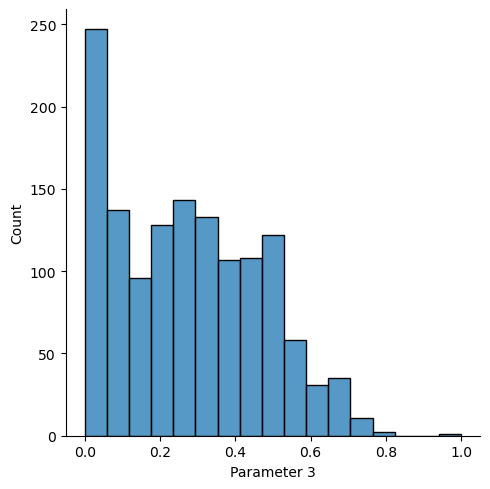

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Distribution of  Parameter 3
Mean is: 0.27233259749815975
Median is: 0.26
Mode is: 0    0.0
Name: Parameter 3, dtype: float64
Standard deviation is: 0.1955365445504639
Skewness is: 0.31272554238899036
Maximum is: 1.0
Minimum is: 0.0


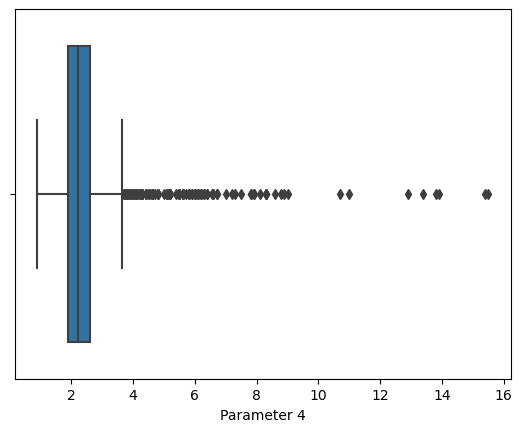

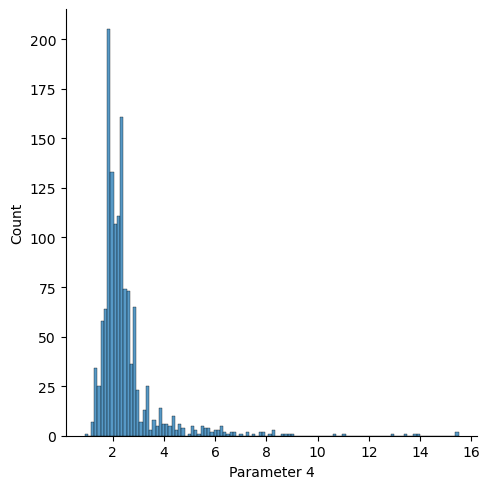

Distribution of  Parameter 4
Mean is: 2.523399558498897
Median is: 2.2
Mode is: 0    2.0
Name: Parameter 4, dtype: float64
Standard deviation is: 1.3523137577104198
Skewness is: 4.548153403940447
Maximum is: 15.5
Minimum is: 0.9


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


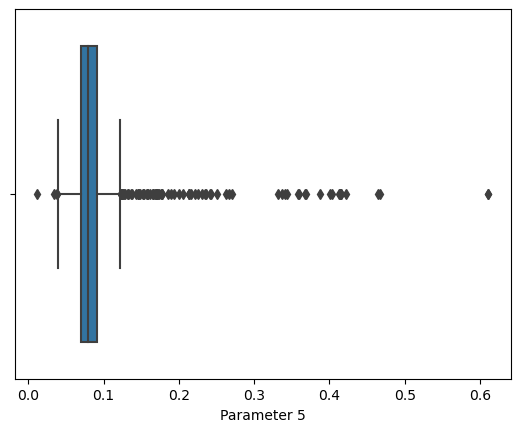

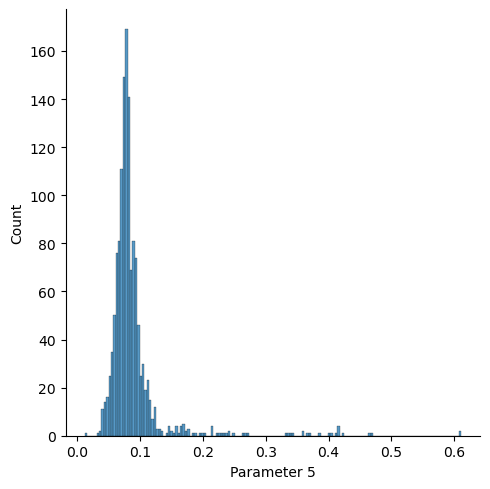

Distribution of  Parameter 5
Mean is: 0.0881236203090504
Median is: 0.079
Mode is: 0    0.08
Name: Parameter 5, dtype: float64
Standard deviation is: 0.04937686244348626
Skewness is: 5.502487294623722
Maximum is: 0.611
Minimum is: 0.012


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


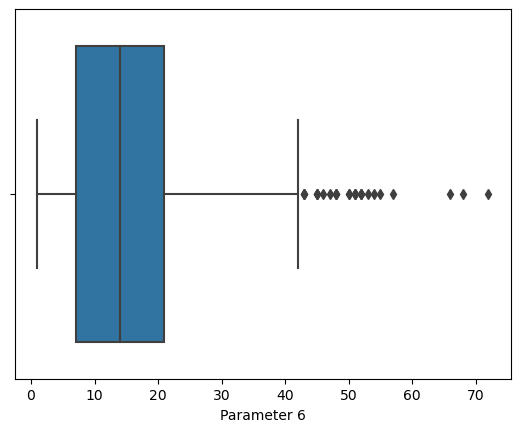

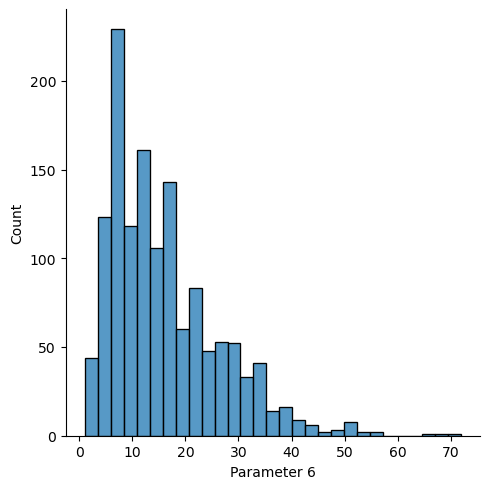

Distribution of  Parameter 6
Mean is: 15.893303899926417
Median is: 14.0
Mode is: 0    6.0
Name: Parameter 6, dtype: float64
Standard deviation is: 10.447270259048695
Skewness is: 1.2265794991760643
Maximum is: 72.0
Minimum is: 1.0


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


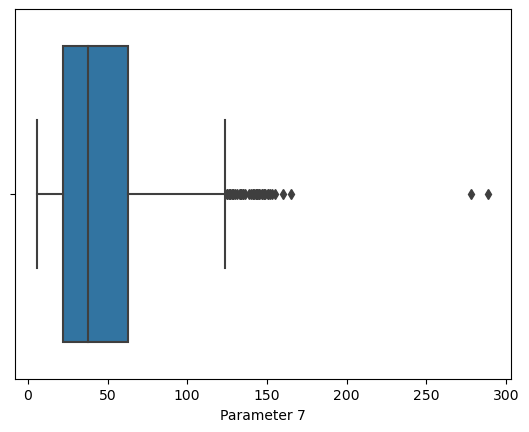

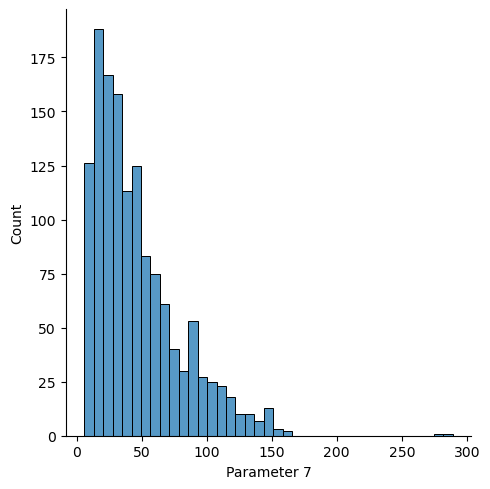

Distribution of  Parameter 7
Mean is: 46.82597498160412
Median is: 38.0
Mode is: 0    28.0
Name: Parameter 7, dtype: float64
Standard deviation is: 33.40894570661654
Skewness is: 1.5403680777213933
Maximum is: 289.0
Minimum is: 6.0


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


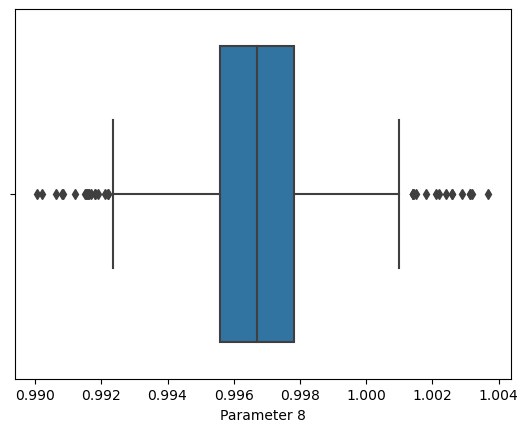

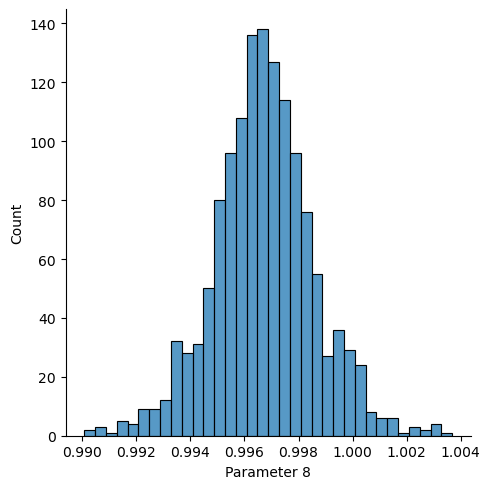

Distribution of  Parameter 8
Mean is: 0.9967089477557026
Median is: 0.9967
Mode is: 0    0.9968
Name: Parameter 8, dtype: float64
Standard deviation is: 0.0018689171325591398
Skewness is: 0.04477785573116107
Maximum is: 1.00369
Minimum is: 0.99007


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


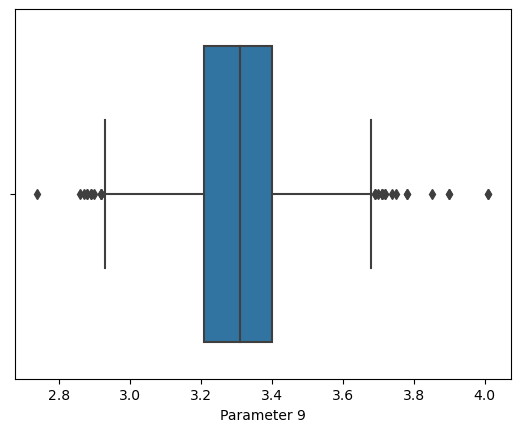

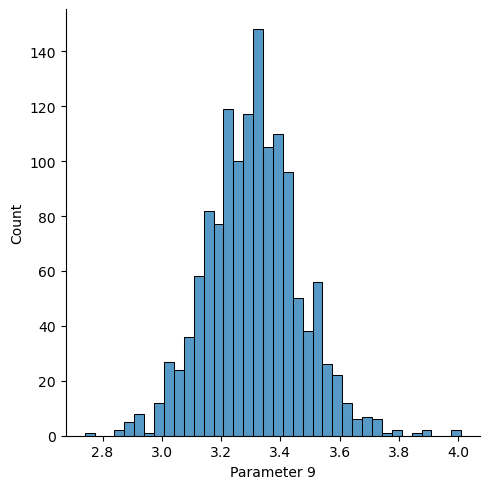

Distribution of  Parameter 9
Mean is: 3.309786607799856
Median is: 3.31
Mode is: 0    3.3
Name: Parameter 9, dtype: float64
Standard deviation is: 0.15503631128729595
Skewness is: 0.2320322752014824
Maximum is: 4.01
Minimum is: 2.74


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


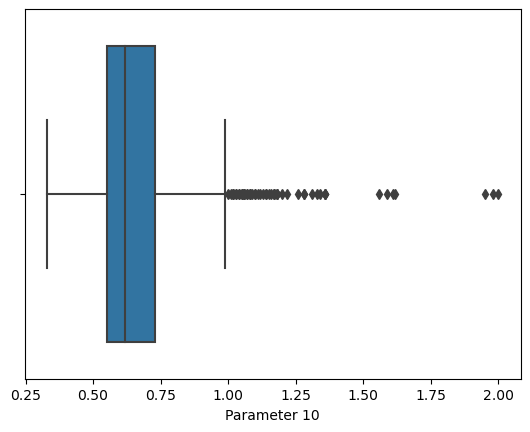

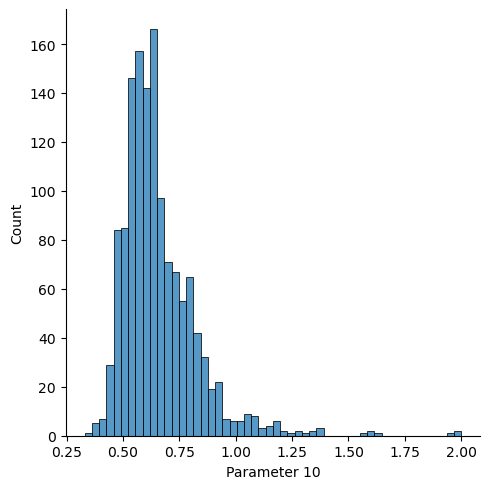

Distribution of  Parameter 10
Mean is: 0.6587049300956593
Median is: 0.62
Mode is: 0    0.54
Name: Parameter 10, dtype: float64
Standard deviation is: 0.17066689057420695
Skewness is: 2.4065046145674196
Maximum is: 2.0
Minimum is: 0.33


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


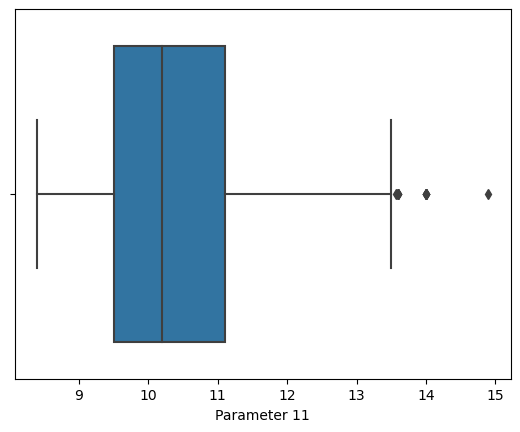

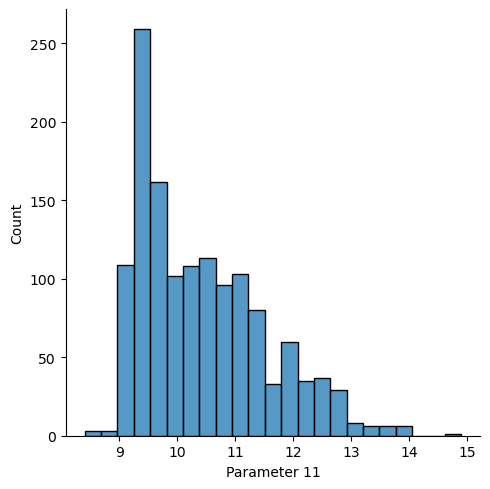

Distribution of  Parameter 11
Mean is: 10.432315428013228
Median is: 10.2
Mode is: 0    9.5
Name: Parameter 11, dtype: float64
Standard deviation is: 1.0820654499497833
Skewness is: 0.8598411692319623
Maximum is: 14.9
Minimum is: 8.4


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


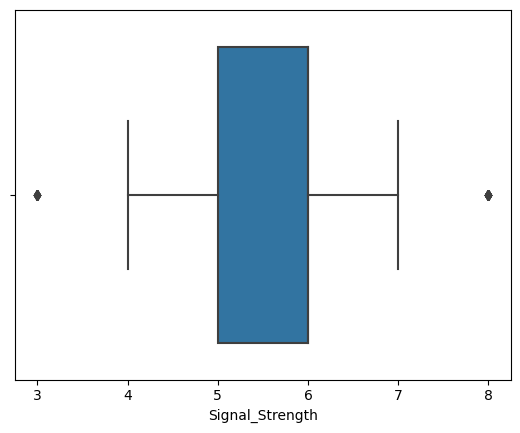

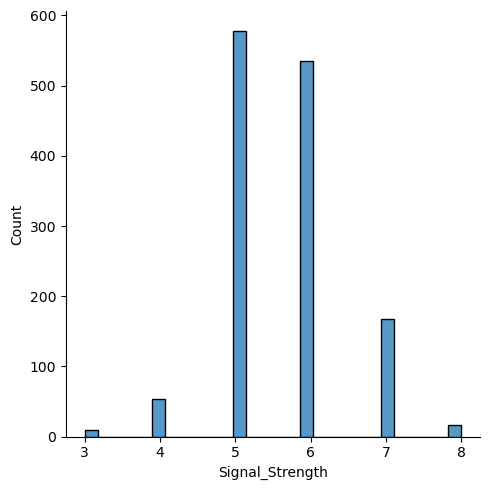

Distribution of  Signal_Strength
Mean is: 5.6232523914643116
Median is: 6.0
Mode is: 0    5
Name: Signal_Strength, dtype: int64
Standard deviation is: 0.8235780017165619
Skewness is: 0.19240658731658308
Maximum is: 8
Minimum is: 3


In [15]:
for col in signal_columns:
    sns.boxplot(signal_data[col])
    sns.displot(signal_data[col])
    plt.show()
    print('Distribution of ',col)
    print('Mean is:',signal_data[col].mean())
    print('Median is:',signal_data[col].median())
    print('Mode is:',signal_data[col].mode())
    print('Standard deviation is:',signal_data[col].std())
    print('Skewness is:',signal_data[col].skew())
    print('Maximum is:',signal_data[col].max())
    print('Minimum is:',signal_data[col].min())

1.   Parameter 7 has maximum standard deviation
2.   Signal strength - 5 has the highest count followed by 6 and 7
3.   Parameter 4, 5 have has huge number of outliers
4.   Most of the Parameter are right skewed


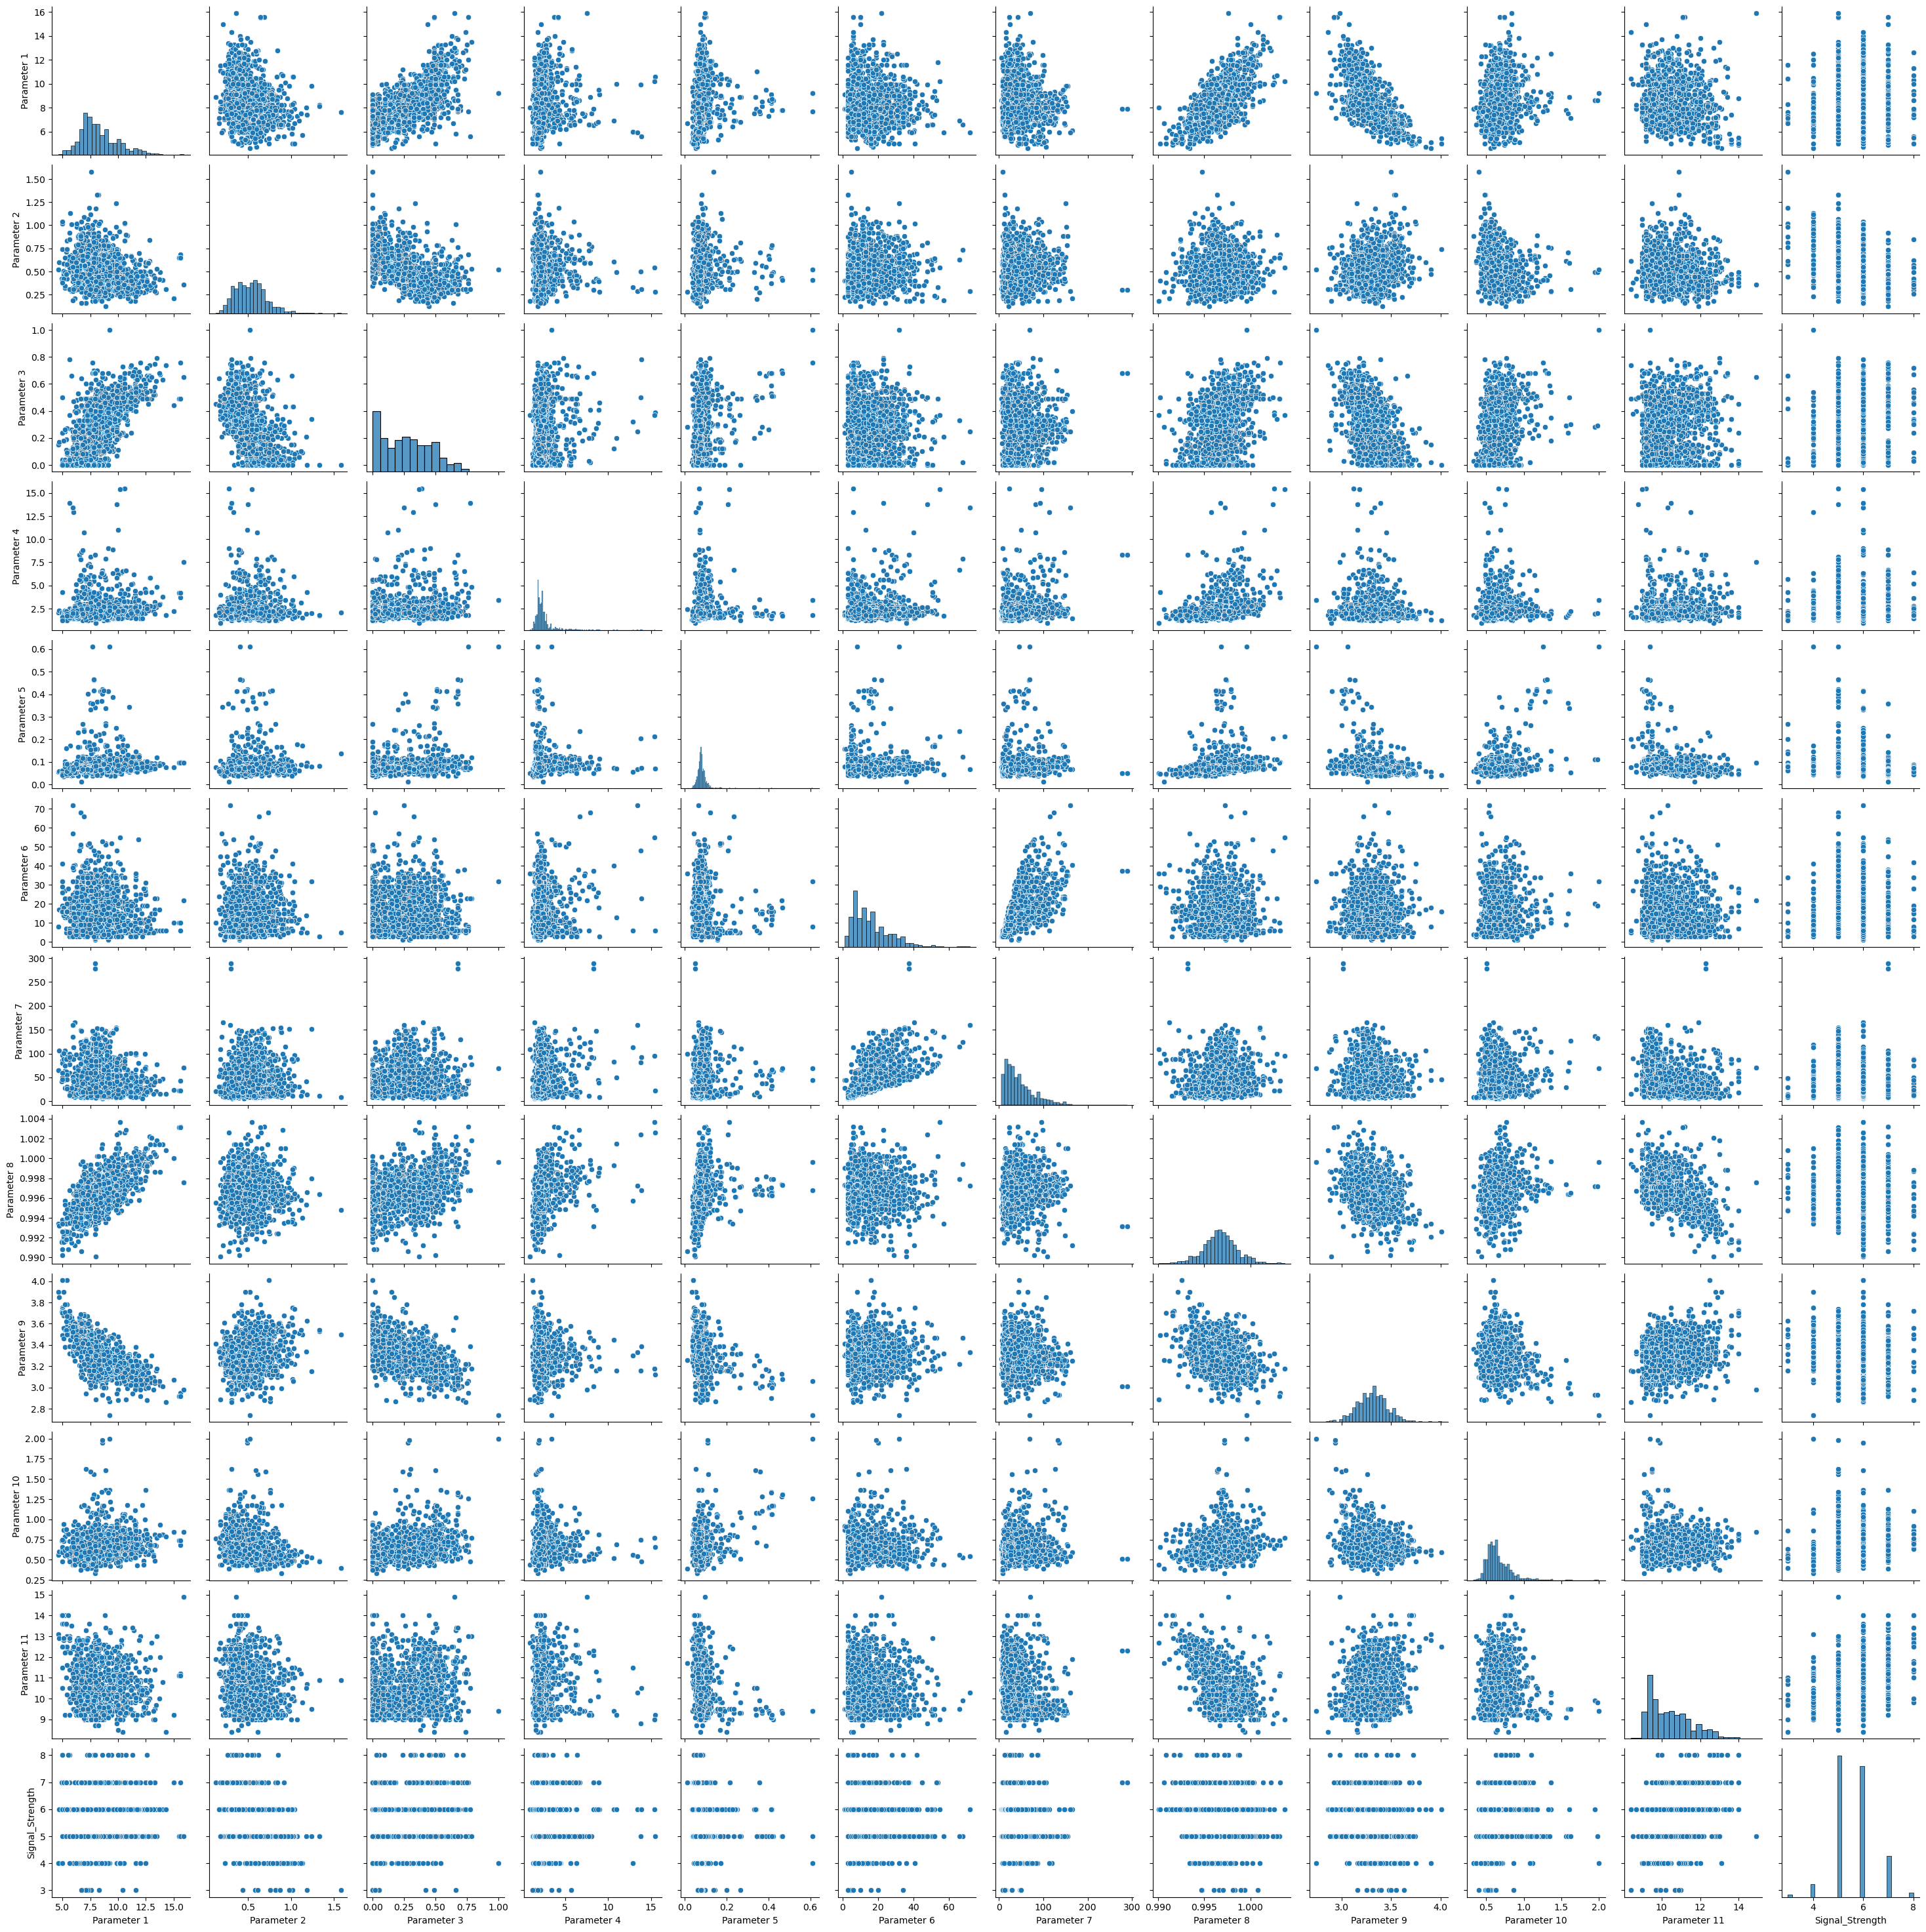

In [16]:
sns.pairplot(signal_data)
plt.show()


1.   Parameter 6 and Parameter 7 are correlated
2.   Parameter 1 is positively correlated to Parameter 3 and Parameter 8
3.   Parameter 1 and parameter 9 are negatively correlated



<AxesSubplot:>

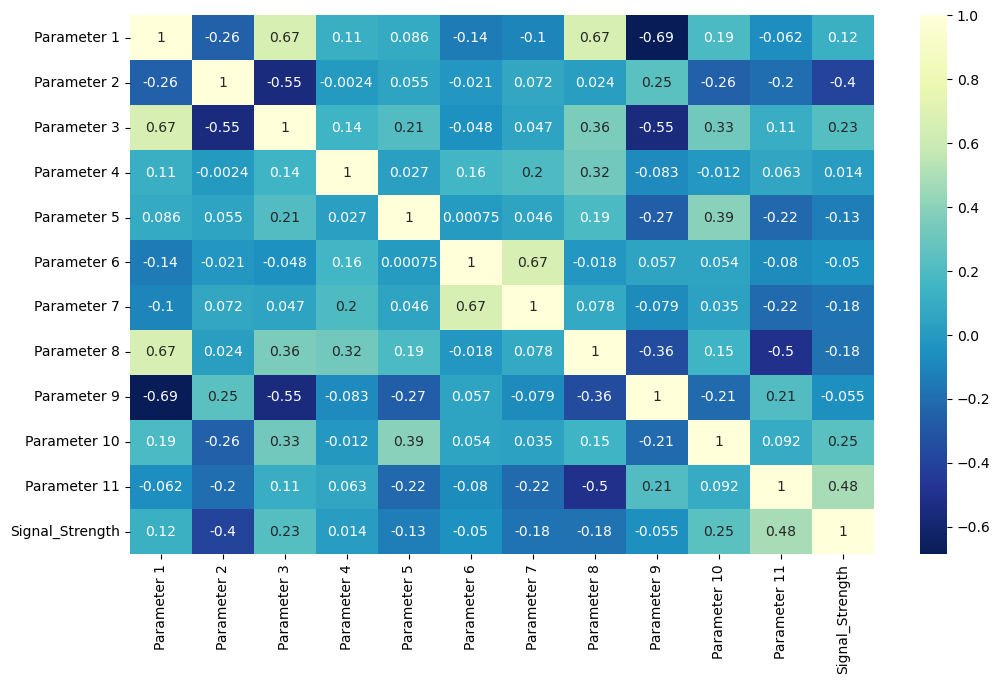

In [17]:
b_corr = signal_data.corr()
plt.subplots(figsize = (12, 7)) 
sns.heatmap(b_corr, annot=True, cmap="YlGnBu_r")

1. Parameter 2 is most negatively correlated with Signal Strength
2. Parameter 11 is most positively correlated with Signal Strength
3. None of the correlations are close to 0.8 to be considered highly correlated

2.A.

In [18]:
X = signal_data.drop("Signal_Strength", axis=1)
y = signal_data['Signal_Strength']

In [19]:
y_cat = tf.keras.utils.to_categorical(y)
y_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

2.B.

In [20]:
# splitting to create test data
x_train, x_test, y_train, y_test = train_test_split(X, y_cat, test_size=.30, random_state = 0)

2.C.

In [21]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(951, 11)
(951, 9)
(408, 11)
(408, 9)


data are in sync with equal number of rows for x and y for both train and test datasets

2.D.

In [22]:
normalizer = preprocessing.Normalizer()

# Normalizing train data
normalized_train_X = normalizer.fit_transform(x_train)

# Normalizing test data
normalized_test_X = normalizer.transform(x_test)

3.A.

In [23]:
# Initialize Sequential model
model = Sequential()

In [24]:
# Adding a dense layer
model.add(Dense(11, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(9, activation='softmax'))

In [25]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

3.B.

In [26]:
history = model.fit(x=normalized_train_X, y= y_train, epochs=100, validation_split=0.35)

Epoch 1/100
20/20 [==============================] - 0s 9ms/step - loss: 2.1808 - accuracy: 0.3123 - val_loss: 2.1522 - val_accuracy: 0.4024
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 2.1254 - accuracy: 0.4175 - val_loss: 2.1054 - val_accuracy: 0.4054
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 2.0772 - accuracy: 0.4110 - val_loss: 2.0622 - val_accuracy: 0.4054
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 2.0321 - accuracy: 0.4369 - val_loss: 2.0222 - val_accuracy: 0.4114
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 1.9903 - accuracy: 0.4175 - val_loss: 1.9837 - val_accuracy: 0.4114
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 1.9496 - accuracy: 0.4401 - val_loss: 1.9473 - val_accuracy: 0.4174
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 1.9113 - accuracy: 0.4385 - val_loss: 1.9130 - val_accuracy: 0.4204
Epoch 8/100
2

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 9)                 108       
                                                                 
 dense_2 (Dense)             (None, 9)                 90        
                                                                 
Total params: 330
Trainable params: 330
Non-trainable params: 0
_________________________________________________________________


In [28]:
eval_hist = model.evaluate(normalized_test_X, y_test)

13/13 [==============================] - 0s 707us/step - loss: 1.2283 - accuracy: 0.4951


In [29]:
y_pred = model.predict(normalized_test_X)
y_pred[0]

13/13 [==============================] - 0s 582us/step


array([0.00573476, 0.00581845, 0.0066573 , 0.00368344, 0.03174327,
       0.40199715, 0.43749237, 0.09248103, 0.01439231], dtype=float32)

3.C.i.

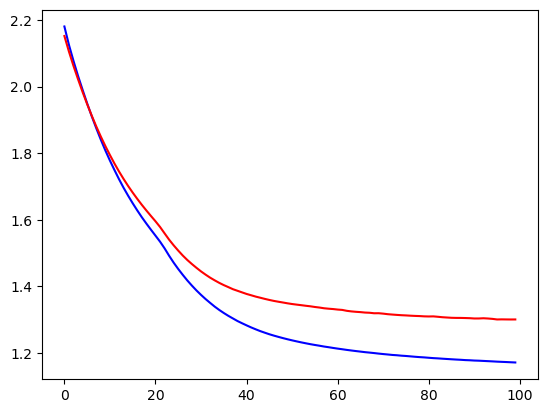

In [30]:
# Training Loss (blue) and Validation Loss (red)
plt.plot(history.history['loss'], color='b', label="loss")
plt.plot(history.history['val_loss'], color='r', label="val_loss")

plt.show()

3.C.ii

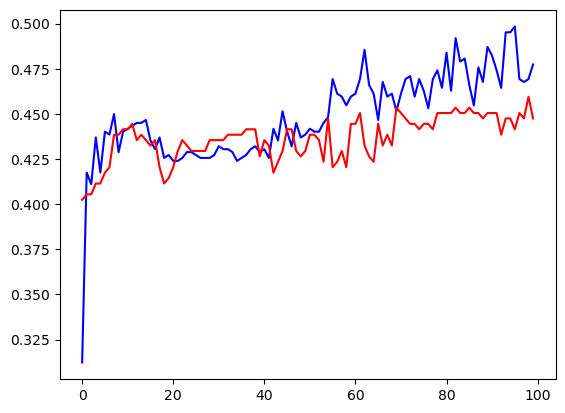

In [31]:
# Training Accuracy (blue) and Validation Accuracy (red)
plt.plot(history.history['accuracy'], color='b', label="accuracy")
plt.plot(history.history['val_accuracy'], color='r', label="val_accuracy")

plt.show()

3.D.

In [32]:
# New Model

# Initialize Sequential model
model_2 = Sequential()
model_2.add(Dense(9, activation='relu'))
model_2.add(Dense(9, activation='sigmoid', kernel_initializer='uniform'))
model_2.add(Dense(9, activation='relu'))
model_2.add(Dense(9, activation='softmax'))

In [33]:
model_2.compile(loss="mse", metrics=["accuracy"], optimizer="sgd")

In [34]:
history = model_2.fit(x=normalized_train_X, y= y_train, epochs=100, validation_split=0.35)

Epoch 1/100
20/20 [==============================] - 0s 7ms/step - loss: 0.1143 - accuracy: 0.0000e+00 - val_loss: 0.1138 - val_accuracy: 0.0000e+00
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.0000e+00 - val_loss: 0.1135 - val_accuracy: 0.0000e+00
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1136 - accuracy: 0.0000e+00 - val_loss: 0.1131 - val_accuracy: 0.0000e+00
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1133 - accuracy: 0.0000e+00 - val_loss: 0.1128 - val_accuracy: 0.0000e+00
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.0000e+00 - val_loss: 0.1125 - val_accuracy: 0.0000e+00
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.0000e+00 - val_loss: 0.1122 - val_accuracy: 0.0000e+00
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1123 - accuracy: 0.0000e+00 - v

In [35]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 9)                 108       
                                                                 
 dense_4 (Dense)             (None, 9)                 90        
                                                                 
 dense_5 (Dense)             (None, 9)                 90        
                                                                 
 dense_6 (Dense)             (None, 9)                 90        
                                                                 
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


3.E.

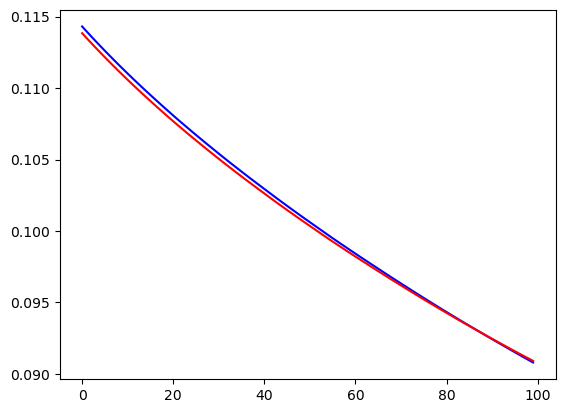

In [36]:
# Training Loss (blue) and Validation Loss (red)
plt.plot(history.history['loss'], color='b', label="loss")
plt.plot(history.history['val_loss'], color='r', label="val_loss")

plt.show()

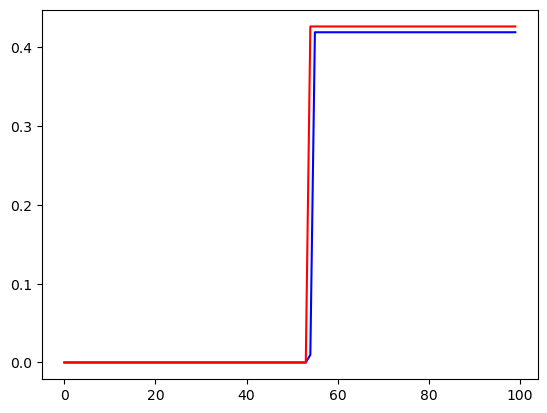

In [37]:
# Training Accuracy (blue) and Validation Accuracy (red)
plt.plot(history.history['accuracy'], color='b', label="accuracy")
plt.plot(history.history['val_accuracy'], color='r', label="val_accuracy")

plt.show()

For model_2 we added
- sigmoid activation
- also the loss function used is mse


- From the 2 graph we can see that the first model with Training Loss and Validation Loss as curve flattening towards right with increasing number of epochs.

- Also the valudation accuracy becomes constant around 0.4 for both the models.

# Part B

1.A.

In [38]:
import h5py

In [39]:
h5f = h5py.File(folderPath + '/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

1.B.

In [40]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

1.C.

In [41]:
X_test = h5f['X_test'][:]
X_train = h5f['X_train'][:]
X_val = h5f['X_val'][:]
y_test = h5f['y_test'][:]
y_train = h5f['y_train'][:]
y_val = h5f['y_val'][:]


In [42]:
h5f.close()

In [43]:
len(X_train), len(X_test), X_train.shape, X_test.shape

(42000, 18000, (42000, 32, 32), (18000, 32, 32))

- there are 42000 training data.
- there are 18000 test data.

2.A.

In [44]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_test.shape)
print(y_train.shape)
print(y_val.shape)

(42000, 32, 32)
(18000, 32, 32)
(60000, 32, 32)
(18000,)
(42000,)
(60000,)


2.B.

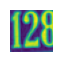

[2]


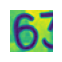

[6]


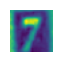

[7]


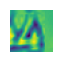

[4]


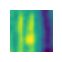

[4]


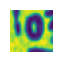

[0]


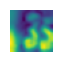

[3]


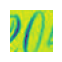

[0]


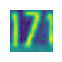

[7]


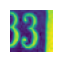

[3]


In [45]:
# visualizing the first 10 images in the dataset and their labels

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.show()
    print(y_train[i: i+1])


2.C.

In [46]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print("\n \n")
print("First image:\n", X_train[0])

Shape: (32, 32)

 

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [47]:
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)
X_val = X_val.reshape(X_val.shape[0], 1024)

2.D.

In [48]:
# Normalise the pixel values

X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

In [49]:
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)
print('Test set:', X_val, X_val)

Training set: (42000, 1024) (42000,)
Test set: (18000, 1024) (18000,)
Test set: [[0.17372157 0.18039177 0.20129648 ... 0.0840902  0.08164353 0.07874981]
 [0.2595059  0.25991058 0.26496157 ... 0.27973488 0.37018237 0.44869727]
 [0.4323859  0.41972825 0.41143882 ... 0.40005568 0.3922133  0.38829216]
 ...
 [0.16611569 0.1610647  0.16130039 ... 0.13170119 0.13796666 0.13796666]
 [0.850962   0.84704083 0.83527726 ... 0.7012145  0.7012145  0.689898  ]
 [0.45171645 0.44779527 0.45171645 ... 0.45866472 0.46258587 0.46371567]] [[0.17372157 0.18039177 0.20129648 ... 0.0840902  0.08164353 0.07874981]
 [0.2595059  0.25991058 0.26496157 ... 0.27973488 0.37018237 0.44869727]
 [0.4323859  0.41972825 0.41143882 ... 0.40005568 0.3922133  0.38829216]
 ...
 [0.16611569 0.1610647  0.16130039 ... 0.13170119 0.13796666 0.13796666]
 [0.850962   0.84704083 0.83527726 ... 0.7012145  0.7012145  0.689898  ]
 [0.45171645 0.44779527 0.45171645 ... 0.45866472 0.46258587 0.46371567]]


2.E.

In [50]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [51]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

2.F.

In [52]:
# number of classes
classes_count = y_test.shape[1] 
print("Number of classes:", classes_count)

Number of classes: 10


3.A.

In [53]:
def nn_model_rrrrs():
    # create model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(classes_count, activation='softmax'))
    return model

In [54]:
model = nn_model_rrrrs()
sgd = optimizers.Adam(lr=1e-3)

### Loss function = Categorical cross entropy
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

c:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


3.B.

In [55]:
model_training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)

Epoch 1/100
140/140 - 1s - loss: 2.3054 - accuracy: 0.1043 - val_loss: 2.2985 - val_accuracy: 0.1108 - 1s/epoch - 9ms/step
Epoch 2/100
140/140 - 1s - loss: 2.1779 - accuracy: 0.1891 - val_loss: 1.9674 - val_accuracy: 0.2739 - 661ms/epoch - 5ms/step
Epoch 3/100
140/140 - 1s - loss: 1.7213 - accuracy: 0.3879 - val_loss: 1.5781 - val_accuracy: 0.4509 - 603ms/epoch - 4ms/step
Epoch 4/100
140/140 - 1s - loss: 1.5308 - accuracy: 0.4781 - val_loss: 1.4207 - val_accuracy: 0.5271 - 657ms/epoch - 5ms/step
Epoch 5/100
140/140 - 1s - loss: 1.3691 - accuracy: 0.5480 - val_loss: 1.3186 - val_accuracy: 0.5646 - 616ms/epoch - 4ms/step
Epoch 6/100
140/140 - 1s - loss: 1.2634 - accuracy: 0.5890 - val_loss: 1.2098 - val_accuracy: 0.6064 - 612ms/epoch - 4ms/step
Epoch 7/100
140/140 - 1s - loss: 1.2065 - accuracy: 0.6100 - val_loss: 1.2249 - val_accuracy: 0.6001 - 908ms/epoch - 6ms/step
Epoch 8/100
140/140 - 1s - loss: 1.1592 - accuracy: 0.6297 - val_loss: 1.1519 - val_accuracy: 0.6335 - 703ms/epoch - 5ms/

3.C.

In [56]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.7054815292358398
Accuracy: 0.8035555481910706


3.D.

Text(0.5, 1.0, 'Training and validation loss')

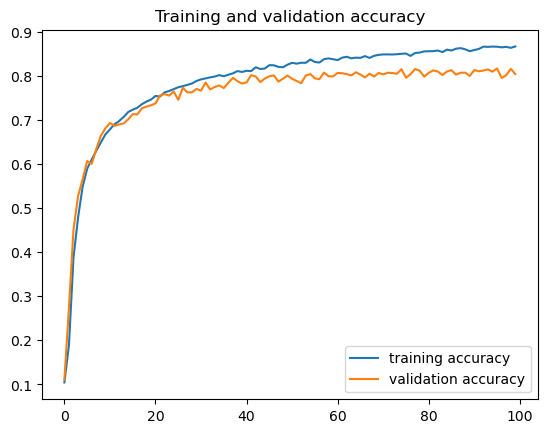

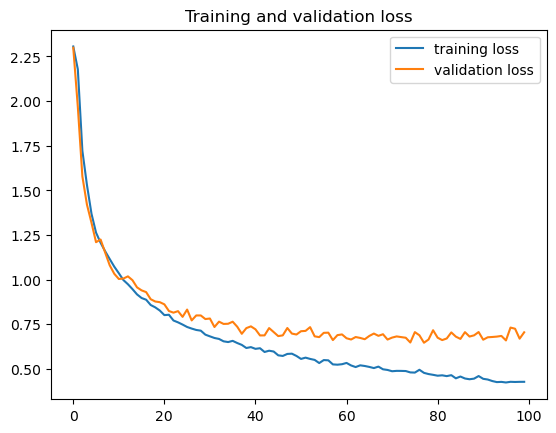

In [57]:
accuracy      = model_training_history.history['accuracy']
val_accuracy  = model_training_history.history['val_accuracy']
loss     = model_training_history.history['loss']
val_loss = model_training_history.history['val_loss']

epochs   = range(len(accuracy))
plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

- Training could achieve an accuracy and loss of :   
    - Accuracy: 0.8089444637298584
    - Loss: 0.6811097264289856
- There are 10 classes in the dataset